This notebook compares the different scatterig model solutions for cod larvae.

In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import array as arr
import inverse_method_funs as inv

In [14]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load data
### ZooScatR results

In [47]:
# Calculated with runCodLarvae.RMD
fname = '../ZooScatStuff/my_data.feather'
zooscat_results = pd.read_feather(fname)

In [48]:
# Add a row for sigma_bs calculated from TS
zooscat_results['sigbs'] = 10**(zooscat_results.TS/10)

freqs_zsr = np.unique(zooscat_results.freq)
sigbs_zsr_cod, ci_boot_cod = inv.bootstrap_interval(zooscat_results, 'FishLarvae')
sigbs_zsr_lima, ci_boot_lima = inv.bootstrap_interval(zooscat_results, 'Limacina')

### Viscous elastic model results
Model run in run_ViscousElasticModel.ipynb

In [49]:
cod_scat = pd.read_csv('../ViscousElasticModel/ve_results/ve_CodLarvae.txt', header=None, delimiter=' ', names=['frequency', 'TS'], skiprows=1)
cod_sigbs_ve = 10**(cod_scat['TS']/10)
freqs_ve = cod_scat['frequency']/1000

In [18]:
lima_scat = pd.read_csv('../ViscousElasticModel/ve_results/ve_Limacina.txt', header=None, delimiter=' ', names=['frequency', 'TS'], skiprows=1)
lima_sigbs_ve = 10**(lima_scat['TS']/10)

## Plot Comparison

### Cod

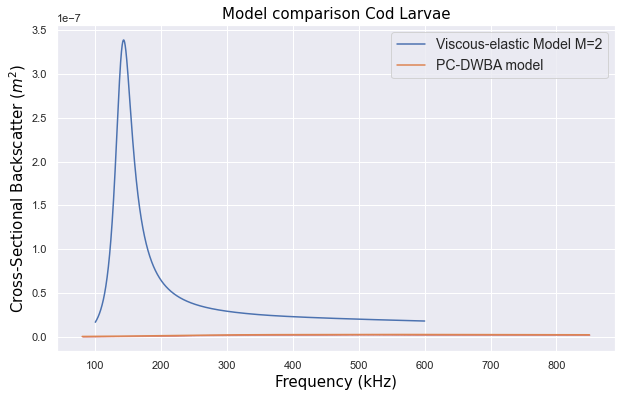

In [19]:
fig=plt.figure(figsize=(10, 6),facecolor='w', edgecolor='k')
plt.plot(freqs_ve,cod_sigbs_ve, label='Viscous-elastic Model M=2')
plt.plot(freqs_zsr,sigbs_zsr_cod, label='PC-DWBA model')
plt.fill_between(freqs_zsr, ci_boot_cod[0,:], ci_boot_cod[1,:], alpha=0.5, color='r')
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.legend(fontsize=14)
plt.title('Model comparison Cod Larvae', title_font)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font);

Text(0.5, 0, 'Frequency (kHz)')

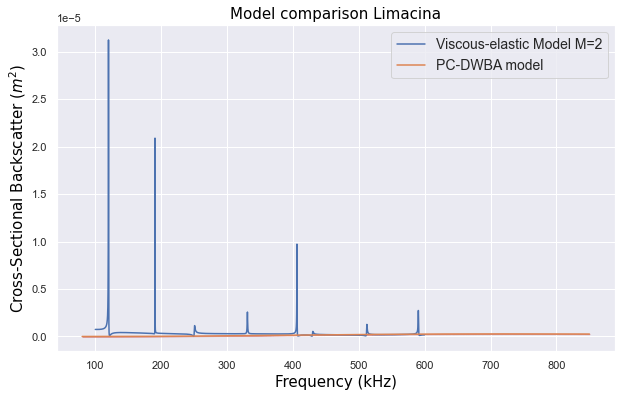

In [20]:
fig=plt.figure(figsize=(10, 6),facecolor='w', edgecolor='k')
plt.plot(freqs_ve,lima_sigbs_ve, label='Viscous-elastic Model M=2')
plt.plot(freqs_zsr,sigbs_zsr_lima, label='PC-DWBA model')
plt.fill_between(freqs_zsr, ci_boot_lima[0,:], ci_boot_lima[1,:], alpha=0.5, color='r')
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.legend(fontsize=14)
plt.title('Model comparison Limacina', title_font)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)

### Over my range

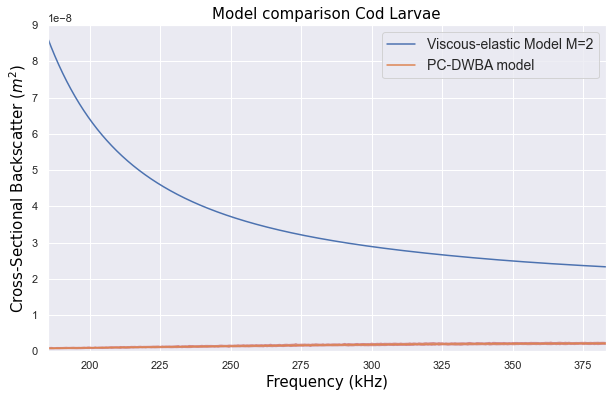

In [21]:
fig=plt.figure(figsize=(10, 6),facecolor='w', edgecolor='k')
plt.plot(freqs_ve,cod_sigbs_ve, label='Viscous-elastic Model M=2')
plt.plot(freqs_zsr,sigbs_zsr_cod, label='PC-DWBA model')
plt.fill_between(freqs_zsr, ci_boot_cod[0,:], ci_boot_cod[1,:], alpha=0.5, color='r')
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.xlim([185,383])
plt.ylim([0, 0.9e-7])
plt.legend(fontsize=14)
plt.title('Model comparison Cod Larvae', title_font)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font);

Text(0.5, 0, 'Frequency (kHz)')

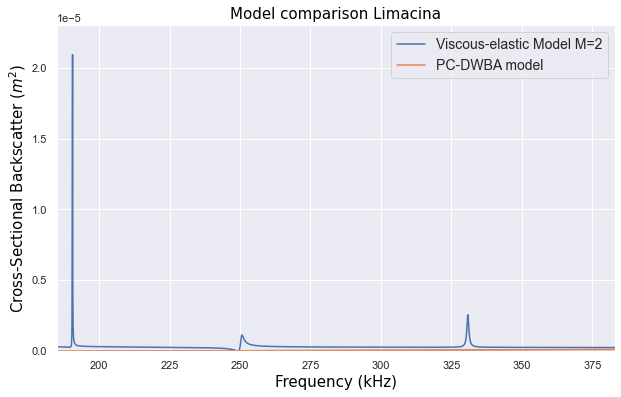

In [35]:
fig=plt.figure(figsize=(10, 6),facecolor='w', edgecolor='k')
plt.plot(freqs_ve,lima_sigbs_ve, label='Viscous-elastic Model M=2')
plt.plot(freqs_zsr,sigbs_zsr_lima, label='PC-DWBA model')
plt.fill_between(freqs_zsr, ci_boot_lima[0,:], ci_boot_lima[1,:], alpha=0.5, color='r')
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.xlim([185,383])
plt.ylim([0, 2.3e-5])
plt.legend(fontsize=14)
plt.title('Model comparison Limacina', title_font)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)

# log

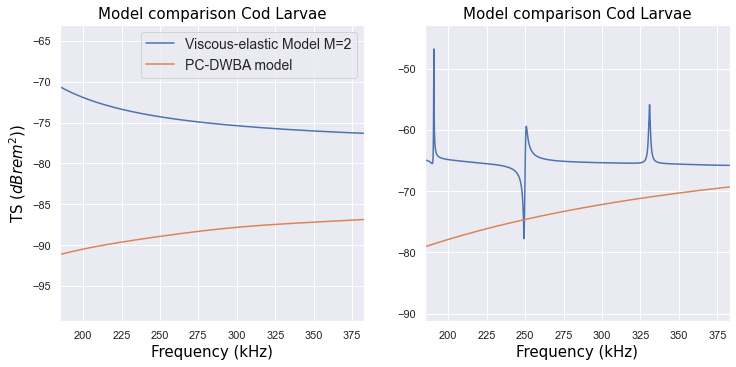

In [52]:
fig=plt.figure(figsize=(12, 12),facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
ax = plt.plot(freqs_ve,cod_scat['TS'],freqs_zsr,10*np.log10(sigbs_zsr_cod))
plt.xlim([185,383])
plt.legend(['Viscous-elastic Model M=2','PC-DWBA model'], fontsize=14)
plt.title('Model comparison Cod Larvae', title_font)
plt.ylabel('TS ($dB re m^{2}$))', axis_font)
plt.xlabel('Frequency (kHz)', axis_font);

plt.subplot(2,2,2)
plt.plot(freqs_ve,lima_scat['TS'],freqs_zsr,10*np.log10(sigbs_zsr_lima))
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.xlim([185,383])
plt.title('Model comparison Cod Larvae', title_font)
plt.xlabel('Frequency (kHz)', axis_font);